In [1]:
import os
import sys

from matplotlib import dates as mdates
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('..')
import util_wsa_uncertainty

sns.set()

In [2]:
os.chdir('..')

In [3]:
df_dataset = pd.read_csv('data/processed/processed_daysahead3_R000.csv', index_col=0)
df_dataset.index = pd.to_datetime(df_dataset.index)
df_dataset.head()

,sigma,Vp_pred,Vp_obs
2010-01-06 18:00:00,60.024994,304.7875,317.801667
2010-01-07 00:00:00,56.502523,308.3000,307.610000
2010-01-07 06:00:00,56.086581,316.1000,293.158333
2010-01-07 12:00:00,49.940925,309.3750,282.966667
2010-01-07 18:00:00,52.316099,302.6500,283.506667


In [4]:
knn_dataset = util_wsa_uncertainty.KnnUncertaintyDataset(input_map='AGONG', sat='ACE', real=0, daysahead=3)

In [22]:
#ts = pd.Timestamp('2010-05-17 00:00:00')
ts = pd.Timestamp('2012-12-20 00:00:00')
idx = df_dataset.index.searchsorted(ts)
idx

4313

In [23]:
NPRED = knn_dataset.npred
NOBS = knn_dataset.nobs

In [24]:
times = df_dataset.iloc[idx : idx + NPRED].index
Vp_obs = df_dataset.Vp_obs.iloc[idx : idx + NOBS]
Vp_pred = df_dataset.Vp_pred.iloc[idx : idx + NPRED]
nbrs =  knn_dataset.lookup_neighbors(times, Vp_obs, Vp_pred, k=100000)

In [25]:
times

DatetimeIndex(['2012-12-20 00:00:00', '2012-12-20 06:00:00',
               '2012-12-20 12:00:00', '2012-12-20 18:00:00',
               '2012-12-21 00:00:00', '2012-12-21 06:00:00',
               '2012-12-21 12:00:00', '2012-12-21 18:00:00',
               '2012-12-22 00:00:00', '2012-12-22 06:00:00',
               '2012-12-22 12:00:00', '2012-12-22 18:00:00',
               '2012-12-23 00:00:00', '2012-12-23 06:00:00',
               '2012-12-23 12:00:00', '2012-12-23 18:00:00',
               '2012-12-24 00:00:00', '2012-12-24 06:00:00',
               '2012-12-24 12:00:00', '2012-12-24 18:00:00',
               '2012-12-25 00:00:00', '2012-12-25 06:00:00',
               '2012-12-25 12:00:00', '2012-12-25 18:00:00',
               '2012-12-26 00:00:00', '2012-12-26 06:00:00',
               '2012-12-26 12:00:00', '2012-12-26 18:00:00',
               '2012-12-27 00:00:00', '2012-12-27 06:00:00',
               '2012-12-27 12:00:00', '2012-12-27 18:00:00',
               '2012-12-

In [26]:
nbrs[1]

KnnUnceratintyNeighbor(before_times=array([Timestamp('2014-05-24 00:00:00'), Timestamp('2014-05-24 06:00:00'),
       Timestamp('2014-05-24 12:00:00'), Timestamp('2014-05-24 18:00:00'),
       Timestamp('2014-05-25 00:00:00'), Timestamp('2014-05-25 06:00:00'),
       Timestamp('2014-05-25 12:00:00'), Timestamp('2014-05-25 18:00:00'),
       Timestamp('2014-05-26 00:00:00'), Timestamp('2014-05-26 06:00:00'),
       Timestamp('2014-05-26 12:00:00'), Timestamp('2014-05-26 18:00:00'),
       Timestamp('2014-05-27 00:00:00'), Timestamp('2014-05-27 06:00:00'),
       Timestamp('2014-05-27 12:00:00'), Timestamp('2014-05-27 18:00:00'),
       Timestamp('2014-05-28 00:00:00'), Timestamp('2014-05-28 06:00:00')],
      dtype=object), before_obs=array([462.56666667, 456.75      , 451.4       , 434.83333333,
       433.41666667, 426.61666667, 412.68333333, 393.73333333,
       390.33333333, 363.25      , 348.61666667, 332.91666667,
       322.48333333, 312.63333333, 316.61666667, 320.9       ,
    

In [27]:
weights = np.array([1/n.distance for n in nbrs])
weights /= weights.max()
nbr_num = np.arange(len(nbrs))

{'ref': <Axes: label='ref'>, 'weights': <Axes: label='weights'>, 'nbr0': <Axes: label='nbr0'>, 'nbr1': <Axes: label='nbr1'>}


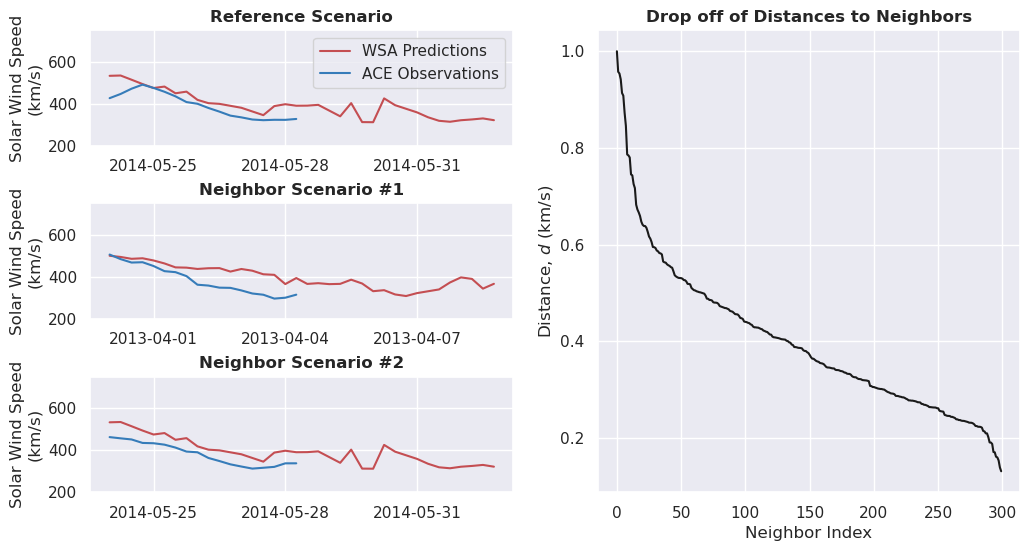

In [32]:
blue_color = '#367cb9'
red_color = 'r'
black_color= 'k'
pred_label = 'WSA Predictions'
obs_label = 'ACE Observations'
speed_ylabel = 'Solar Wind Speed\n(km/s)'
datetime_form = mdates.DateFormatter("%Y-%m-%d")

fig, axes = plt.subplot_mosaic([['ref', 'weights'], ['nbr0', 'weights'], ['nbr1', 'weights']], figsize=(12, 6))
print(axes)

ax = axes['ref']
ax.plot(times, Vp_pred, color=red_color, label=pred_label)
ax.plot(times[:NOBS], Vp_obs, color=blue_color, label=obs_label)
ax.set_ylabel(speed_ylabel)
ax.set_title('Reference Scenario', fontweight='bold')
ax.legend(loc='upper right')

for i in range(2):
    ax = axes[f'nbr{i}']

    times = np.concatenate((nbrs[i].before_times, nbrs[i].after_times))
    Vp_pred = np.concatenate((nbrs[i].before_pred, nbrs[i].after_pred))
    
    ax.plot(times, Vp_pred, color=red_color, label=pred_label)
    ax.plot(nbrs[i].before_times, nbrs[i].before_obs, color=blue_color, label=obs_label)
    ax.set_ylabel(speed_ylabel)
    ax.set_title(f'Neighbor Scenario #{i+1}', fontweight='bold')

for ax_code in ['ref', 'nbr0', 'nbr1']:
    ax = axes[ax_code]
    ax.set_yticks([200, 400, 600])
    ax.set_ylim(200, 750)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))


ax = axes['weights']
ax.plot(nbr_num, weights, color=black_color)
ax.set_ylabel('Distance, $d$ (km/s)')
ax.set_xlabel('Neighbor Index')
#ax.set_ylim(0, 1)
ax.set_title('Drop off of Distances to Neighbors', fontweight='bold')

plt.subplots_adjust(wspace=0.2, hspace=.5) 
fig.savefig('plots/neighbors_example.png', dpi=300)